# First Order Approximation Method applied using numpy and pandas
## Midpoint Method applied for quadratic and complicated (y = e^x - x^3) equation 
#### For quadratic equation, midpoint method gives the perfect estimated and actual equation
#### For complicated equation, midpoint method applied upwards from fourth derivative to y allows for storng approximation
Made in Feb 2019, markdown comments added on 9 Jun 2019

In [1]:
import numpy as np
import pandas as pd

#Quadratic equation of x^2-2x-3 (roots at -1 and 3)
ode = np.array([[2,2,2,2,2,2,2,2,2,2],[-22,-20,-18,-16,-14,-12,-10,-8,-6,-4],[117,96,77,60,45,32,21,12,5,0], \
               [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]],dtype=np.float64)
ode2= pd.DataFrame(ode.T,columns=['Second der','First der','y','x'])
ode2

,Second der,First der,y,x
0,2.0,-22.0,117.0,-10.0
1,2.0,-20.0,96.0,-9.0
2,2.0,-18.0,77.0,-8.0
3,2.0,-16.0,60.0,-7.0
4,2.0,-14.0,45.0,-6.0
5,2.0,-12.0,32.0,-5.0
6,2.0,-10.0,21.0,-4.0
7,2.0,-8.0,12.0,-3.0
8,2.0,-6.0,5.0,-2.0
9,2.0,-4.0,0.0,-1.0


In [2]:
ode2.iloc[9][1]

-4.0

In [3]:
ode2.values.shape

(10, 4)

### Given the second derivative, initial first derivative and initial x, y...
#### Use midpoint method to carry changes to first derivative and finally to y
#### Plot the actual (solid line) vs estimated graph (dashed line)
#### Both graphs are the same

In [4]:
units = 11

new = pd.DataFrame(np.zeros([units,4],dtype=np.float64),columns=['Second der','First der','y','x'])
#Remember to define column names of new to be same as extended or there will be errors
extended = pd.concat([ode2,new],axis=0) #add new rows below by using concat & axis=0

for i in range(0,units): #adding 10 rows
    secondder = 2 #second deriative at current row
    #1st derivative at current row, row 11
    firstder = extended.iloc[i+9][1] + (secondder+extended.iloc[i+9][0])/2  
    #dy/dx for current row, row 11
    #When i=0, gets dy/dx from row10 col1 + (half of 2nd derivative @ row11 + half of 2nd derivative @ row10)* 1 unit
    y = extended.iloc[i+9][2] + (firstder + extended.iloc[i+9][1])/2
    #When i=0, gets y from row10 col 2 + (half of 1st derivative @ row 11 + half of 1st derivative @ row 10)* 1 unit
    x = i
    #starting assigning row 11 [i+10=10] and col 0-3, with increasing row and i
    extended.iloc[i+10][0] = secondder
    extended.iloc[i+10][1] = firstder
    extended.iloc[i+10][2] = y
    extended.iloc[i+10][3] = x
    #print(str(secondder) + ' ' + str(firstder) + ' ' + str(y))
    
#Can be applied for cubic equations too

#Add actual values of y
z = np.array([117,96,77,60,45,32,21,12,5,0,-3,-4,-3,0,5,12,21,32,45,60,77],copy=True)
extended['Actual y'] = z

In [5]:
#Rearrange columns to put actual y next to y for comparison
extended = extended[['Second der','First der','Actual y','y','x']]

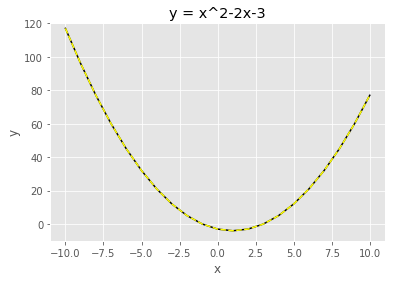

In [6]:
#extended[['x','y']]

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.style.use('ggplot') #change sttyle
plt.plot(extended['x'],extended['y'], color='black') #plot(x array, y array) - must be same 1Dsize
plt.plot(extended['x'],extended['Actual y'],linestyle='--',color='yellow')
plt.title('y = x^2-2x-3') #title
plt.xlabel('x') #x label and y label
plt.ylabel('y')
plt.ylim(bottom = -10, top = 120) #specify limits of showing graph 
plt.show()
#ymin, ymax are being deprecated, use bottom and top instead

In [7]:
#Complex equation of y = e^x - x^3
#dy/dx = e^x - 3x^2
#d2y/dx2 = e^x - 6x
#d3y/dx3 = e^x - 6
#d4y/dx4 = e^x
#y: 1000,729,512,343,216
#dy/dx: -300,-243,-192,-147,-108
#d2y/dx2: 60,54,48,42,36
#d3y/dx3: -6,-6,-6,-6,-6
#d4y/dx4: np.exp(x)+12/(x**5)

import numpy as np

fourhead = np.array([[-10,-9,-8,-7,-6], \
                     [np.exp(-10),np.exp(-9),np.exp(-8),np.exp(-7),np.exp(-6)], \
                     [-6,-6,-6,-5.999,-5.998],[60,54,48,42,36],[-300,-243,-192,-147,-108], \
                     [1000,729,512,343,216]],dtype=np.float64)
#List 5 values for each differential in horizontal, then transpose them to become vertical (per column - easier to read/edit)
fourhead= pd.DataFrame(fourhead.T,columns=['x','d4y/dx4','d3y/dx3','d2y/dx2','dy/dx','y'])
fourhead

,x,d4y/dx4,d3y/dx3,d2y/dx2,dy/dx,y
0,-10.0,0.000045,-6.000,60.0,-300.0,1000.0
1,-9.0,0.000123,-6.000,54.0,-243.0,729.0
2,-8.0,0.000335,-6.000,48.0,-192.0,512.0
3,-7.0,0.000912,-5.999,42.0,-147.0,343.0
4,-6.0,0.002479,-5.998,36.0,-108.0,216.0


In [8]:
#Complex equation of y = e^x - x^3

units = 12 #adds units rows in for loop

new4head = pd.DataFrame(np.zeros([units,6],dtype=np.float64),columns=['x','d4y/dx4','d3y/dx3','d2y/dx2','dy/dx','y'])
#Remember to define column names of new to be same as extended or there will be errors
sobayed = pd.concat([fourhead,new4head],axis=0) #add new rows below by using concat & axis=0

for i in range(0,units): #adding 11 rows
    x = i-5 #starts at x = -5 and goes to 4
    #Must calculate from d4y/dx4 all the way down to y
    #Since the latest derivative not saved inside DF yet, need to use a variable to save it and reference down each derivative
    #New values = Old value + 1/2(New derivative) + 1/2(Old derivative)
    fourthder = np.exp(i-5)
    thirdder = sobayed.iloc[i+4][2] + (fourthder + sobayed.iloc[i+4][1])/2
    secondder = sobayed.iloc[i+4][3] + (thirdder + sobayed.iloc[i+4][2])/2 
    firstder = sobayed.iloc[i+4][4] + (secondder + sobayed.iloc[i+4][3])/2  
    y = sobayed.iloc[i+4][5] + (firstder + sobayed.iloc[i+4][4])/2

    #Assigning calculated values to new row
    sobayed.iloc[i+5][0] = x
    sobayed.iloc[i+5][1] = fourthder
    sobayed.iloc[i+5][2] = thirdder
    sobayed.iloc[i+5][3] = secondder
    sobayed.iloc[i+5][4] = firstder
    sobayed.iloc[i+5][5] = y

#Calculate the actual y in a list and convert to nparray then append to original DF
actually = []
for j in range(-10,units-5): #original 5 rows + units intervals
    actual = np.exp(j) - j**3
    actually.append(actual)

    
#Add actual values of y
actual_y = np.array(actually,copy=True)
sobayed['Actual y'] = actual_y

#Calculate Difference column between estimated and ctual y
sobayed['Difference'] = sobayed['y'] - sobayed['Actual y']

In [9]:
sobayed

,x,d4y/dx4,d3y/dx3,d2y/dx2,dy/dx,y,Actual y,Difference
0,-10.0,0.000045,-6.000000,60.000000,-300.000000,1000.000000,1000.000045,-0.000045
1,-9.0,0.000123,-6.000000,54.000000,-243.000000,729.000000,729.000123,-0.000123
2,-8.0,0.000335,-6.000000,48.000000,-192.000000,512.000000,512.000335,-0.000335
3,-7.0,0.000912,-5.999000,42.000000,-147.000000,343.000000,343.000912,-0.000912
4,-6.0,0.002479,-5.998000,36.000000,-108.000000,216.000000,216.002479,-0.002479
0,-5.0,0.006738,-5.993392,30.004304,-74.997848,124.501076,125.006738,-0.505662
1,-4.0,0.018316,-5.980865,24.017176,-47.987108,63.008598,64.018316,-1.009717
2,-3.0,0.049787,-5.946814,18.053337,-26.951852,25.539118,27.049787,-1.510669
3,-2.0,0.135335,-5.854252,12.152804,-11.848781,6.138802,8.135335,-1.996533
4,-1.0,0.367879,-5.602645,6.424355,-2.560202,-1.065689,1.367879,-2.433569


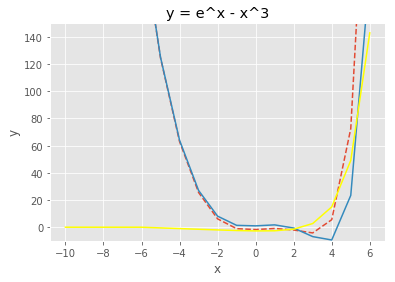

In [10]:
#extended[['x','y']]

import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') #change sttyle
plt.plot(sobayed['x'],sobayed['y'],linestyle='--') #plot(x array, y array) - must be same 1Dsize
plt.plot(sobayed['x'],sobayed['Actual y'])
plt.plot(sobayed['x'],sobayed['Difference'],color='yellow')
plt.title('y = e^x - x^3') #title
plt.xlabel('x') #x label and y label
plt.ylabel('y')
plt.ylim(bottom = -10, top = 150) #specify limits of showing graph 
#ymin, ymax are being deprecated, use bottom and top instead
plt.show()

### Notice how the estimated graph (dotted red) is lagging behind the actual graph (blue)
1. This is because of the large step size of 1 compared to the infinitely small differential updates of a continuous function
2. Error function in yellow shows that graph fits very well up to x=3 where the error exponentially increased
3. It shows that graph estimation techniques like Midpoint & Euler Method are not effective in covering sudden changes in graph shape even if it starts from the 4th order up to y
4. Could be a better idea to adopt piecewise function to cover different parts of the graph